# Image Classification Using Deep Learning.

The aim of this project is to delve into the principles of transfer learning and its significance in image classification and compare results of using transfer learning vs. training a model from scratch for the same image classification task

For the project, I will be making use of the CIFAR10 small images classification dataset


In [ ]:
# Importing the CIFAR10 dataset
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D,MaxPool2D, BatchNormalization, Dropout, Flatten
from tensorflow.keras.utils import  to_categorical
from tensorflow.keras.optimizers import Adam, SGD
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
import seaborn as sns


In [ ]:
# Loading the data
(X_train, y_train), (X_test,y_test) =cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [ ]:
# Checking the shape of the train and test data
X_train.shape, X_test.shape, y_train.shape


((50000, 32, 32, 3), (10000, 32, 32, 3), (50000, 1))

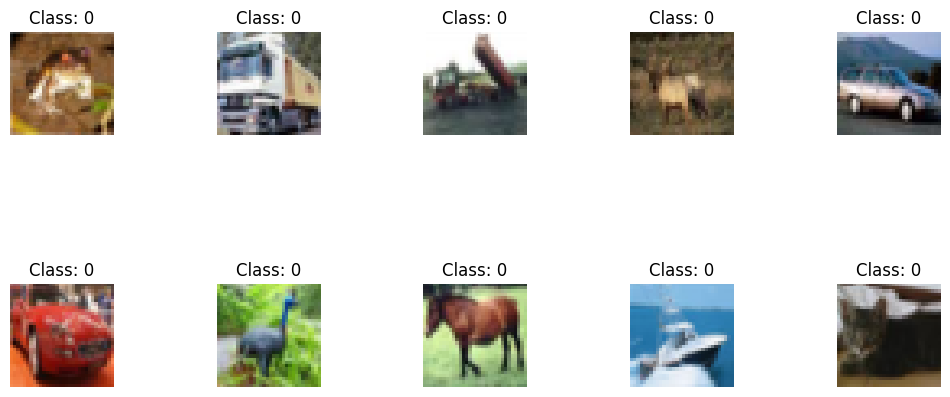

In [ ]:
# Visualizing sample images from the CIFAR-10 dataset

class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
axes = axes.ravel()

for i in np.arange(0, 10):
    axes[i].imshow(X_train[i])
    axes[i].set_title(f"Class: {y_train[i].argmax()}")
    axes[i].axis('off')

plt.subplots_adjust(wspace=1)
plt.show()

EDA Analysis

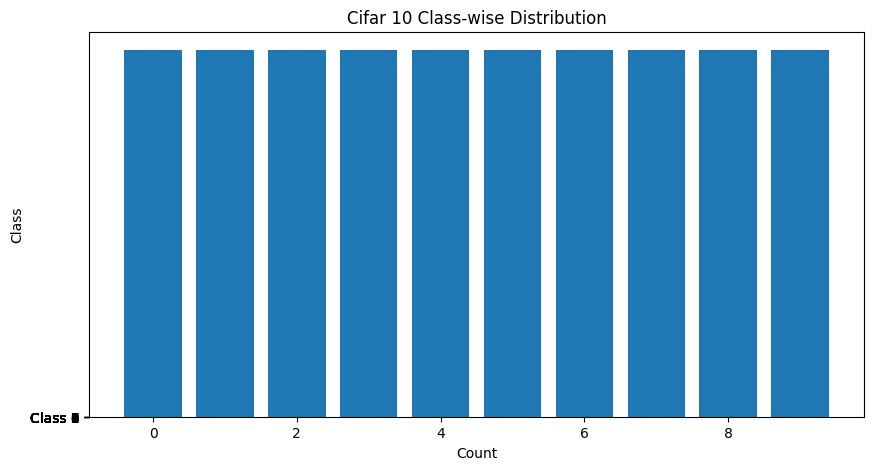

In [ ]:
# Class-wise distribution in training set
class_counts = np.sum(y_train, axis=0)

plt.figure(figsize=(10, 5))
plt.bar(np.arange(10), class_counts)
plt.title('Cifar 10 Class-wise Distribution')
plt.xlabel('Count')
plt.ylabel('Class')
plt.yticks(np.arange(10), labels=[f'Class {i}' for i in range(10)])
plt.show()


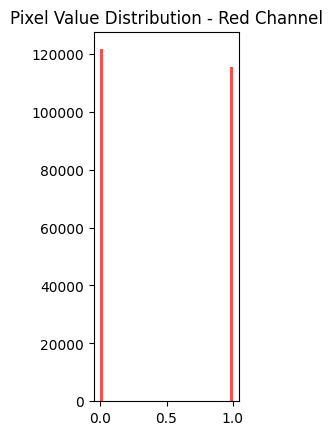

In [ ]:
# Plotting histograms for three color channels
plt.subplot(1, 3, 1)
plt.hist(X_train[:, :, :, 0].flatten(), bins=50, color='red', alpha=0.7, label='Red', range=[0, 1])
plt.title('Pixel Value Distribution - Red Channel')

plt.show()

Text(0.5, 1.0, 'Pixel Value Distribution - Green Channel')

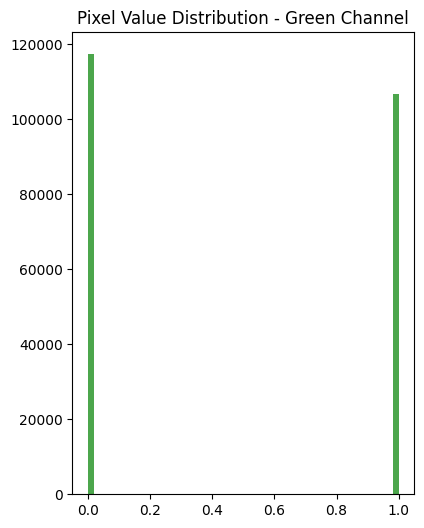

In [ ]:

plt.figure(figsize=(15, 6))
plt.subplot(1, 3, 2)
plt.hist(X_train[:, :, :, 1].flatten(), bins=50, color='green', alpha=0.7, label='Green', range=[0, 1])
plt.title('Pixel Value Distribution - Green Channel')




Text(0.5, 1.0, 'Pixel Value Distribution - Blue Channel')

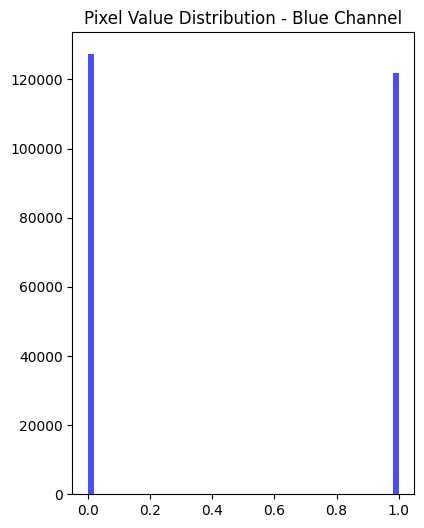

In [ ]:
# Blue Colour
plt.figure(figsize=(15, 6))

plt.hist(X_train[:, :, :, 2].flatten(), bins=50, color='Blue', alpha=0.7, label='Blue', range=[0, 1])
plt.title('Pixel Value Distribution - Blue Channel')


**Data Preprocessing**

In [ ]:
# Encoding the target class
y_train=to_categorical(y_train, num_classes=10)
y_test=to_categorical(y_test, num_classes=10)



In [ ]:
# Normalizing the data
X_train_nom= X_train/255
X_test_nom =X_test/255

# Converting to a 32 float data type
X_train_nom = X_train_nom.astype('float32')
X_test_nom = X_test_nom.astype('float32')

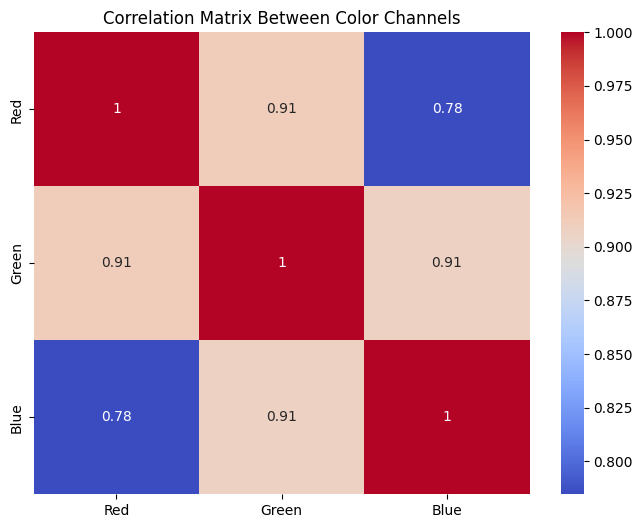

In [ ]:
# Calculate the correlation matrix for each color channel
# Reshape the color channels into 1D arrays
red_channel = X_train_nom[:, :, :, 0].reshape(-1)
green_channel = X_train_nom[:, :, :, 1].reshape(-1)
blue_channel = X_train_nom[:, :, :, 2].reshape(-1)

# Stack the channels along the last axis and compute the correlation matrix
channels_stacked = np.stack((red_channel, green_channel, blue_channel), axis=-1)
corr_matrix = np.corrcoef(channels_stacked, rowvar=False)

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, xticklabels=['Red', 'Green', 'Blue'], yticklabels=['Red', 'Green', 'Blue'], cmap='coolwarm')
plt.title('Correlation Matrix Between Color Channels')
plt.show()



BUILDING A CNN MODEL FROM SCRATCH

In [ ]:
# Specifying the model
model=Sequential()

model.add(Conv2D(64, kernel_size=(3,3), activation='relu', padding='same', input_shape=(32,32,3)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))


# Compiling the Model

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])


# Fitting te Model
training=model.fit(X_train_nom, y_train, validation_split=0.2, batch_size=64,epochs=10)

Epoch 1/10
625/625 [==============================] - 8s 5ms/step - loss: 1.6415 - accuracy: 0.4048 - val_loss: 1.3453 - val_accuracy: 0.5290
Epoch 2/10
625/625 [==============================] - 2s 4ms/step - loss: 1.3186 - accuracy: 0.5288 - val_loss: 1.1719 - val_accuracy: 0.5950
Epoch 3/10
625/625 [==============================] - 2s 4ms/step - loss: 1.1943 - accuracy: 0.5749 - val_loss: 1.0581 - val_accuracy: 0.6283
Epoch 4/10
625/625 [==============================] - 3s 4ms/step - loss: 1.1209 - accuracy: 0.6029 - val_loss: 1.0154 - val_accuracy: 0.6480
Epoch 5/10
625/625 [==============================] - 2s 4ms/step - loss: 1.0538 - accuracy: 0.6300 - val_loss: 0.9954 - val_accuracy: 0.6546
Epoch 6/10
625/625 [==============================] - 2s 4ms/step - loss: 1.0002 - accuracy: 0.6435 - val_loss: 0.9484 - val_accuracy: 0.6727
Epoch 7/10
625/625 [==============================] - 2s 4ms/step - loss: 0.9532 - accuracy: 0.6634 - val_loss: 0.9105 - val_accuracy: 0.6906
Epoch 

In [ ]:
#Checking the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 7, 7, 32)          0         
                                                                 
 flatten (Flatten)           (None, 1568)              0

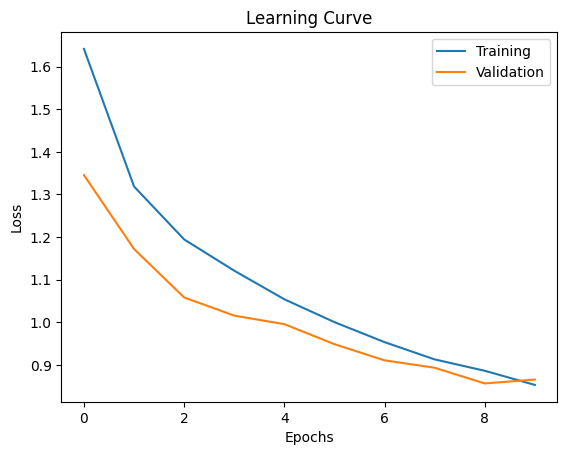

In [ ]:
# Exploring the Learning Curve
plt.plot(training.history['loss'], label='Training')
plt.plot(training.history['val_loss'], label='Validation')

# Setting labels and title
plt.xlabel('Epochs')  # Label for the X-axis
plt.ylabel('Loss')  # Label for the Y-axis
plt.title('Learning Curve')  # Title for the plot

# Display the legend
plt.legend()

# Show the plot
plt.show()


# Evaluating CNN Prediction

In [ ]:
# Evaluating the model performance on the test dat
model.evaluate(X_test_nom,y_test)


313/313 [==============================] - 1s 2ms/step - loss: 0.8743 - accuracy: 0.6912


[0.8743012547492981, 0.6912000179290771]

In [ ]:
# Making prediction
predictions=model.predict(X_test_nom)
#Preparing Labels for Confusion Matrix Calculation
predicted_labels = np.argmax(predictions, axis=1)
actual_labels = np.argmax(y_test, axis=1)



313/313 [==============================] - 1s 2ms/step


Text(0.5, 1.0, ' CNN Model Confusion Matrix')

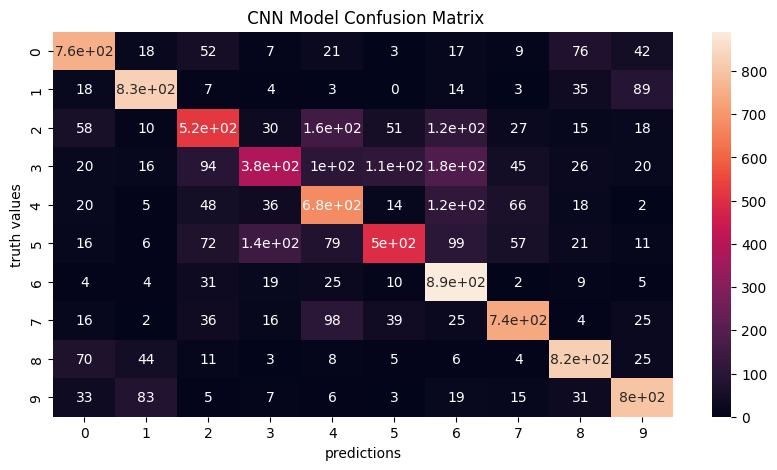

In [ ]:
#Computing confusion matrix
plt.figure(figsize=(10,5))
cm=metrics.confusion_matrix(actual_labels,predicted_labels)
sns.heatmap(cm, annot=True)
plt.ylabel('truth values')
plt.xlabel('predictions')
plt.title(' CNN Model Confusion Matrix')

In [ ]:
# Computing the Classification Report
print(metrics.classification_report(actual_labels,predicted_labels))

              precision    recall  f1-score   support

           0       0.75      0.76      0.75      1000
           1       0.81      0.83      0.82      1000
           2       0.59      0.52      0.55      1000
           3       0.59      0.39      0.47      1000
           4       0.58      0.68      0.62      1000
           5       0.68      0.50      0.57      1000
           6       0.60      0.89      0.72      1000
           7       0.76      0.74      0.75      1000
           8       0.78      0.82      0.80      1000
           9       0.77      0.80      0.78      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.68     10000
weighted avg       0.69      0.69      0.68     10000



## **IMAGE CLASSIFICATION USING TRANSFER LEARNING**

For the classification using transfer learning, the VGG 16 pretrained model is among the top 5 pretrained model with the best accuracy in ImageNet classification.The VGG16 model is trained on classifying 1000 images of 1000 different categories.

In [ ]:
# Importing the pretrained model
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#from tensorflow.keras.regularizers import l2
#from tensorflow.keras.callbacks import EarlyStopping


In [ ]:
# Create an ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Example: Augmenting training data
augmented_images = []
augmented_labels = []
for image, label in zip(X_train_resized, y_train):
    image = tf.expand_dims(image, 0)  # Add batch dimension
    augmented_image = datagen.flow(image).next()[0]
    augmented_images.append(augmented_image)
    augmented_labels.append(label)

X_train_augmented = np.array(augmented_images)
y_train_augmented = np.array(augmented_labels)

In [ ]:
# Resize CIFAR-10 images to VGG16 input size (224x224)
X_train_resized = tf.image.resize(X_train_nom, (84, 84))
X_test_resized = tf.image.resize(X_test_nom, (84,84))


In [ ]:
# Loading the model with the new imput shape
VGG =VGG16(weights='imagenet', include_top=False, input_shape=(84,84,3))


58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
# Creating a new model
VGG_model=Sequential()

# adding VGG pretained to our model
VGG_model.add(VGG)

# Adding the pretrained convulutional blocks to the output layer
VGG_model.add(Flatten())
VGG_model.add(Dense(512, activation='relu'))
VGG_model.add(Dense(256, activation='relu'))
VGG_model.add(Dense(10, activation='softmax'))

# Unfreezing the last convutional block of the pretrained model to finetune the model
for layer in VGG.layers[-4:]:
  layer.trainable=False

# Compile the model with a lower learning rate for fine tuning
VGG_model.compile(optimizer=SGD(), loss='categorical_crossentropy', metrics=['accuracy'])

# Creating an Early Stopping Call back
#early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Training the mode
VGG_model.fit(X_train_resized, y_train, validation_split=0.2, batch_size=32, epochs=10)
#,kernel_regularizer=l2(0.01) callbacks=[early_stopping]


Epoch 1/10
1250/1250 [==============================] - 39s 29ms/step - loss: 0.9094 - accuracy: 0.6809 - val_loss: 0.4102 - val_accuracy: 0.8577
Epoch 2/10
1250/1250 [==============================] - 35s 28ms/step - loss: 0.3911 - accuracy: 0.8651 - val_loss: 0.4051 - val_accuracy: 0.8555
Epoch 3/10
1250/1250 [==============================] - 35s 28ms/step - loss: 0.2695 - accuracy: 0.9067 - val_loss: 0.3033 - val_accuracy: 0.8923
Epoch 4/10
1250/1250 [==============================] - 34s 27ms/step - loss: 0.1898 - accuracy: 0.9338 - val_loss: 0.2743 - val_accuracy: 0.9060
Epoch 5/10
1250/1250 [==============================] - 34s 27ms/step - loss: 0.1337 - accuracy: 0.9539 - val_loss: 0.2741 - val_accuracy: 0.9091
Epoch 6/10
1250/1250 [==============================] - 34s 28ms/step - loss: 0.0923 - accuracy: 0.9690 - val_loss: 0.3213 - val_accuracy: 0.9026
Epoch 7/10
1250/1250 [==============================] - 34s 28ms/step - loss: 0.0670 - accuracy: 0.9775 - val_loss: 0.2744 -

In [ ]:
# Checking Model Summary
VGG_model.summary()

# Evaluating CNN Prediction

In [ ]:
# Evaluate the pretrained model
VGG_model.evaluate(X_test_resized, y_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.2920 - accuracy: 0.9208


[0.29199928045272827, 0.920799970626831]

In [ ]:
# Making prediction with the pretrained model
VGG_predictions=VGG_model.predict(X_test_resized)
#Preparing Labels for Confusion Matrix Calculation
VGG_predicted_labels = np.argmax(VGG_predictions, axis=1)
actual_labels = np.argmax(y_test, axis=1)


313/313 [==============================] - 3s 8ms/step


Text(0.5, 1.0, 'VGG16 Confusion Matrix')

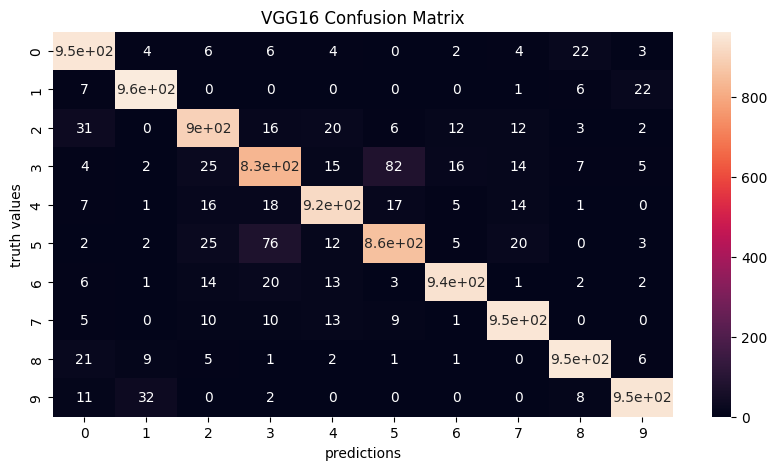

In [ ]:
#Computing VGG confusion matrix
plt.figure(figsize=(10,5))
cm=metrics.confusion_matrix(actual_labels,VGG_predicted_labels)
sns.heatmap(cm, annot=True)
plt.ylabel('truth values')
plt.xlabel('predictions')
plt.title('VGG16 Confusion Matrix')

In [ ]:
# Computing the Classification Report
print(metrics.classification_report(actual_labels,VGG_predicted_labels))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93      1000
           1       0.95      0.96      0.96      1000
           2       0.90      0.90      0.90      1000
           3       0.85      0.83      0.84      1000
           4       0.92      0.92      0.92      1000
           5       0.88      0.85      0.87      1000
           6       0.96      0.94      0.95      1000
           7       0.94      0.95      0.94      1000
           8       0.95      0.95      0.95      1000
           9       0.96      0.95      0.95      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



# Accuracy Comparison

Text(0.5, 1.0, 'Accuracy_score:CNN Model Vs VGG16 Transfer Learning')

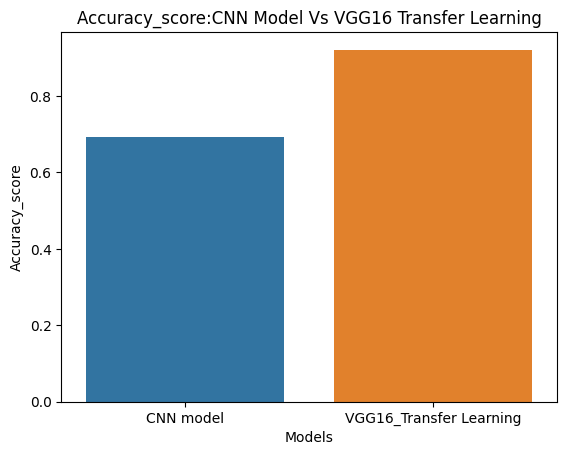

In [ ]:
#Computing the accuarcy
VGG_Model_accuracy=metrics.accuracy_score(actual_labels,VGG_predicted_labels)
model_accuracy=metrics.accuracy_score(actual_labels,predicted_labels)

scores=[model_accuracy,VGG_Model_accuracy]
names=['CNN model',  'VGG16_Transfer Learning']

#Plotting the accuracy scores for comparison
sns.barplot(y=scores, x=names)
plt.xlabel('Models')
plt.ylabel('Accuracy_score')
plt.title('Accuracy_score:CNN Model Vs VGG16 Transfer Learning')